## k-최근접 이웃의 한계

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [7]:
data=pd.read_csv('chap3.csv')

length=data['length'].to_numpy()
weight=data['weight'].to_numpy()

In [9]:
train_input,test_input,train_target,test_target=train_test_split(length,weight,random_state=42)

In [11]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [14]:
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [15]:
prevalue=knr.predict([[50]])
print(prevalue)
prevalue=knr.predict([[100]])
print(prevalue)

[1033.33333333]
[1033.33333333]


In [16]:
dis,idx=knr.kneighbors([[50]])#50cm 농어의 이웃을 구함
print(idx)

[[34  8 14]]


In [18]:
trainvalues=train_input[idx],train_target[idx]
print(trainvalues)

(array([[[44.],
        [43.],
        [43.]]]), array([[1000., 1000., 1100.]]))


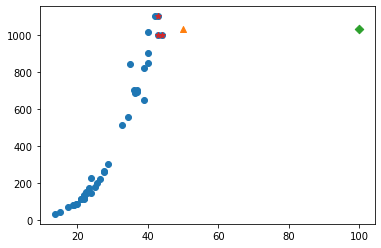

In [24]:
plt.scatter(train_input,train_target)
plt.scatter(50,1033,marker="^")
plt.scatter(100,1033,marker="D")
plt.scatter(train_input[idx],train_target[idx],marker="*")
plt.show()